In [1308]:
import pandas as pd
import numpy as np

In [1309]:
carprice = pd.read_csv("CarPrice_Assignment.csv")

In [1310]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Checking if there are any columns having only one value to drop such columns, as they wont add any value to our analysis.

In [1311]:
for col in carprice.columns:
    if (len(carprice[col].unique()) == 1):
        print(col)
        print(carprice[col].value_counts())
        print()
   

There are no such columns.

#### Percantage of null values in each column

In [1312]:
100*carprice.isnull().sum()/len(carprice)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

There are no null values in any of the columns.

In [1313]:
carprice['carcompany'] = carprice.CarName.str.split().str.get(0)

In [1314]:
carprice = carprice.drop('CarName',axis=1)

In [1315]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [1316]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [1317]:
carprice.shape

(205, 26)

Dropping card_ID as it is just a unique identifier per row and will not add any value. 

In [1318]:
carprice = carprice.drop('car_ID',axis=1)

In [1319]:
carprice.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carcompany'],
      dtype='object')

In [1320]:
carprice.carcompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Here we see that some car company spellings have some variations, correcting such records.

In [1321]:
carprice.carcompany = carprice.carcompany.str.lower()
carprice.carcompany = carprice.carcompany.str.replace('maxda','mazda')
carprice.carcompany = carprice.carcompany.str.replace('porcshce','porsche')
carprice.carcompany = carprice.carcompany.str.replace('toyouta','toyota')
carprice.carcompany = carprice.carcompany.str.replace('vw','volkswagen')
carprice.carcompany = carprice.carcompany.str.replace('vokswagen','volkswagen')

In [1322]:
import matplotlib.pyplot as plt
import seaborn as sns

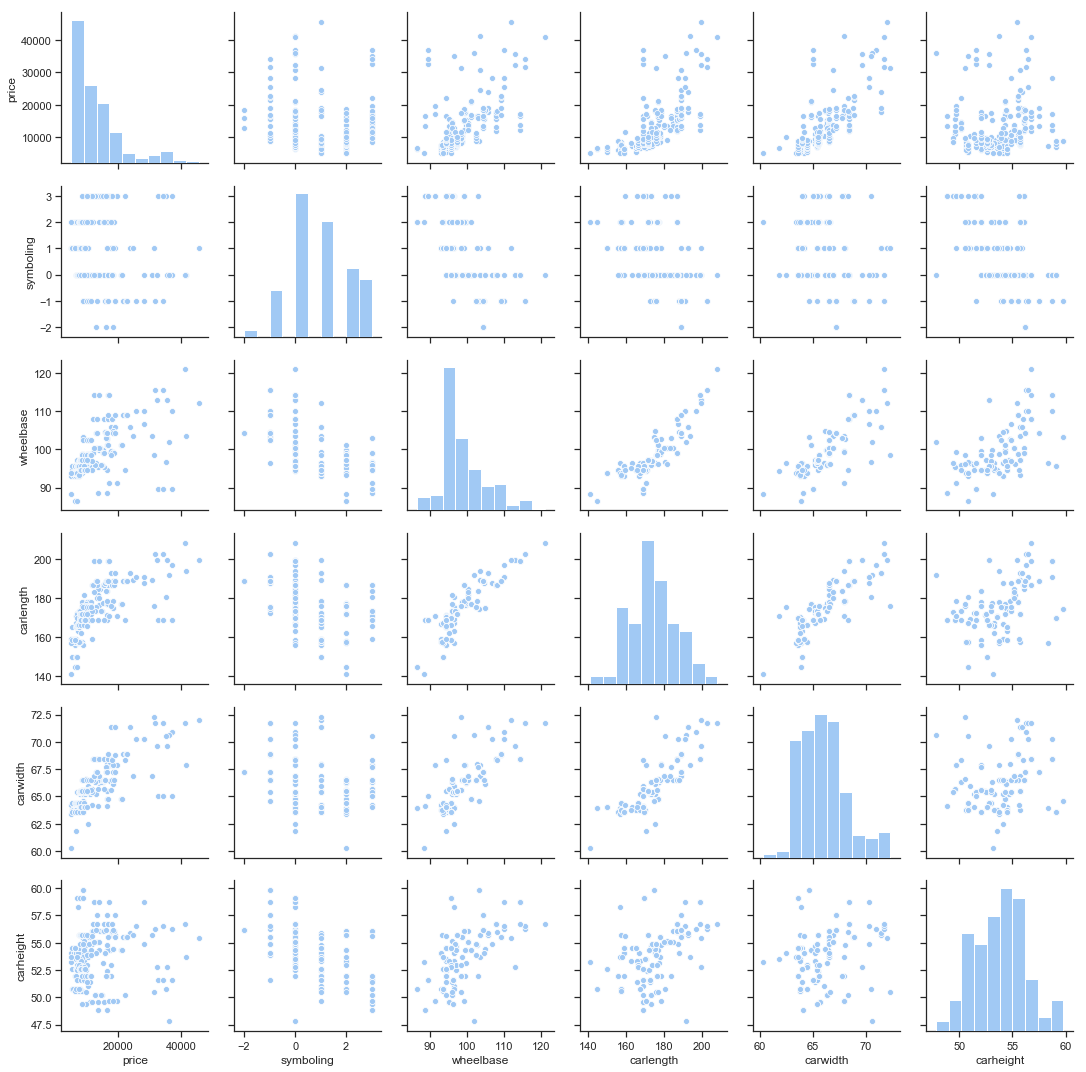

In [1323]:
sns.pairplot(carprice.loc[:, ['price','symboling','wheelbase','carlength','carwidth','carheight']],kind='scatter')
plt.show()

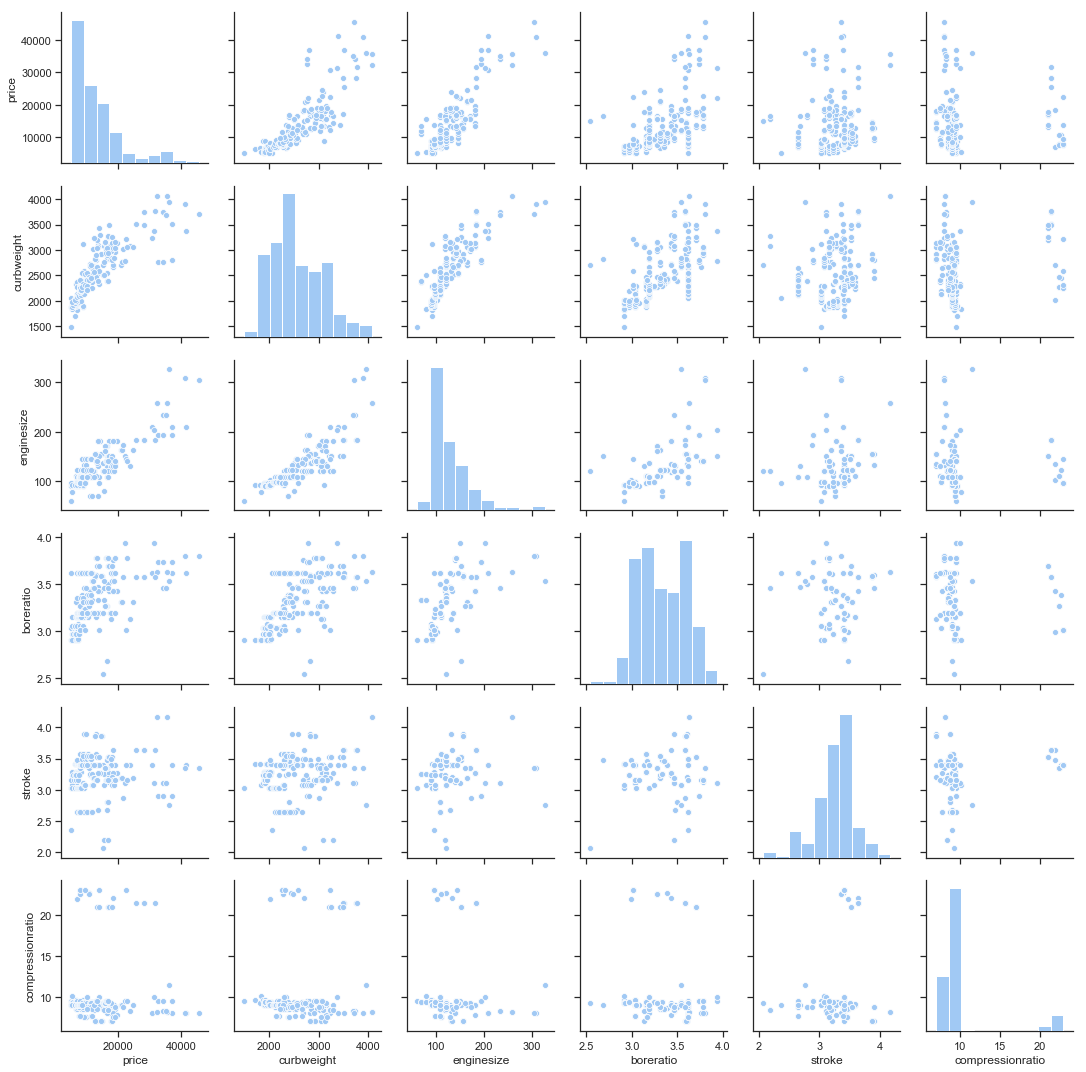

In [1324]:
sns.pairplot(carprice.loc[:, ['price','curbweight','enginesize','boreratio','stroke','compressionratio']],kind='scatter')#'carbody','drivewheel',
plt.show()

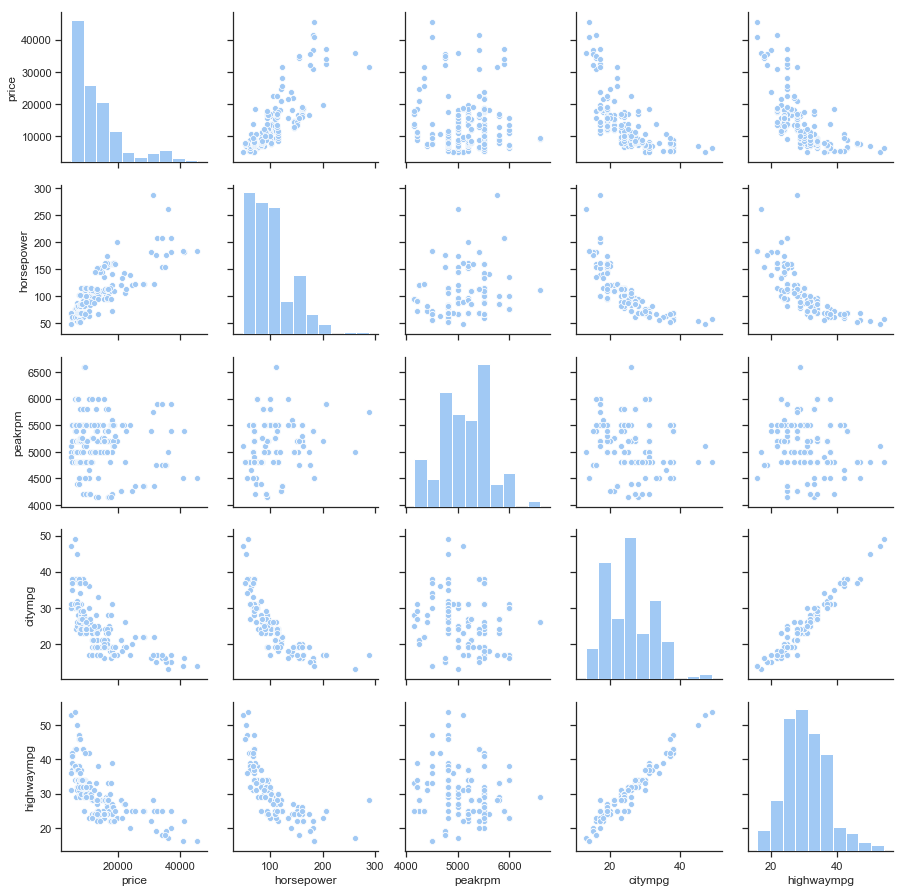

In [1325]:
sns.pairplot(carprice.loc[:, ['price','horsepower','peakrpm','citympg','highwaympg']],kind='scatter')
plt.show()

Heat map to check collinearity between independent variables and drop the redundunt variables.

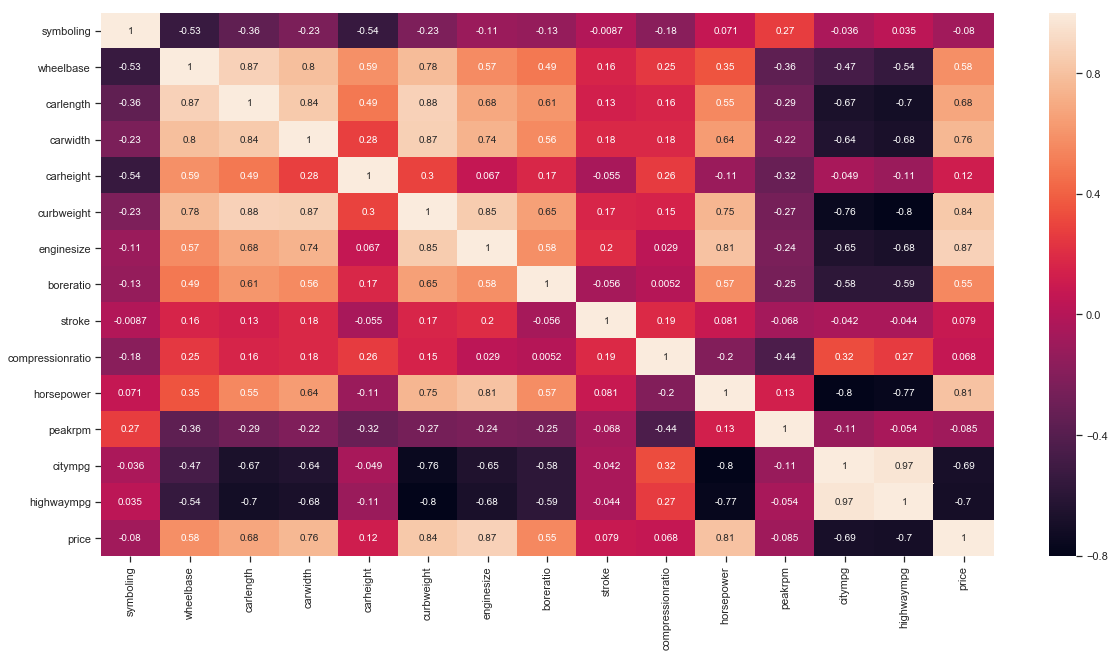

In [1326]:
plt.figure(figsize = (20,10))  
sns.heatmap(carprice.corr(),annot = True)

Some high collinearity between independent variables below:

0.87 between wheelbase and carlength

0.84 between carwidth and carlength

0.88 between curbweight and carlength

0.97 between highwaympg and citympg

But instead of taking a decision to drop one of the variables in the correlation, lets use RFE to eliminate features.

Boxplots for categorical variables below:

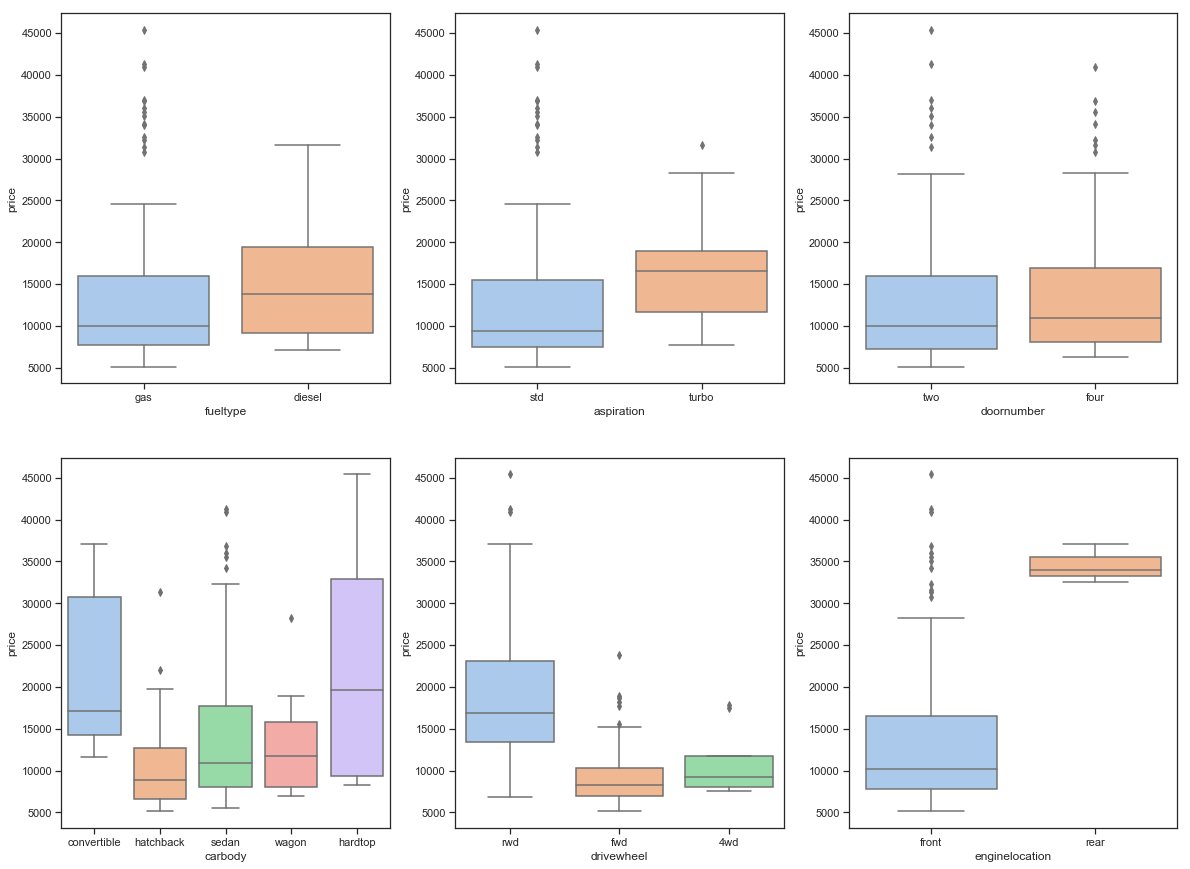

In [1327]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(2,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(2,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.show()

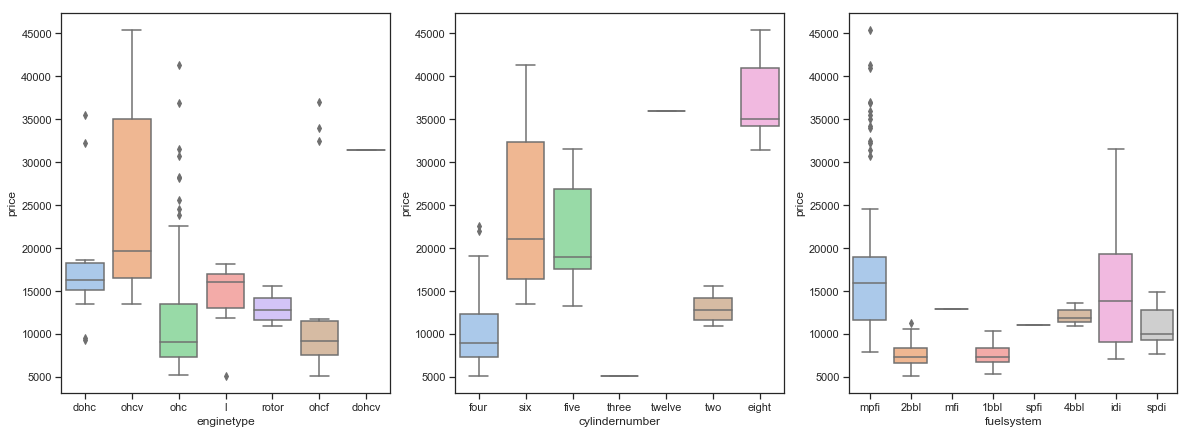

In [1328]:
plt.figure(figsize=(20, 7))
plt.subplot(1,3,1)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(1,3,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(1,3,3)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.show()

[Text(0, 0, 'alfa-romero'),
 Text(0, 0, 'audi'),
 Text(0, 0, 'bmw'),
 Text(0, 0, 'chevrolet'),
 Text(0, 0, 'dodge'),
 Text(0, 0, 'honda'),
 Text(0, 0, 'isuzu'),
 Text(0, 0, 'jaguar'),
 Text(0, 0, 'mazda'),
 Text(0, 0, 'buick'),
 Text(0, 0, 'mercury'),
 Text(0, 0, 'mitsubishi'),
 Text(0, 0, 'nissan'),
 Text(0, 0, 'peugeot'),
 Text(0, 0, 'plymouth'),
 Text(0, 0, 'porsche'),
 Text(0, 0, 'renault'),
 Text(0, 0, 'saab'),
 Text(0, 0, 'subaru'),
 Text(0, 0, 'toyota'),
 Text(0, 0, 'volkswagen'),
 Text(0, 0, 'volvo')]

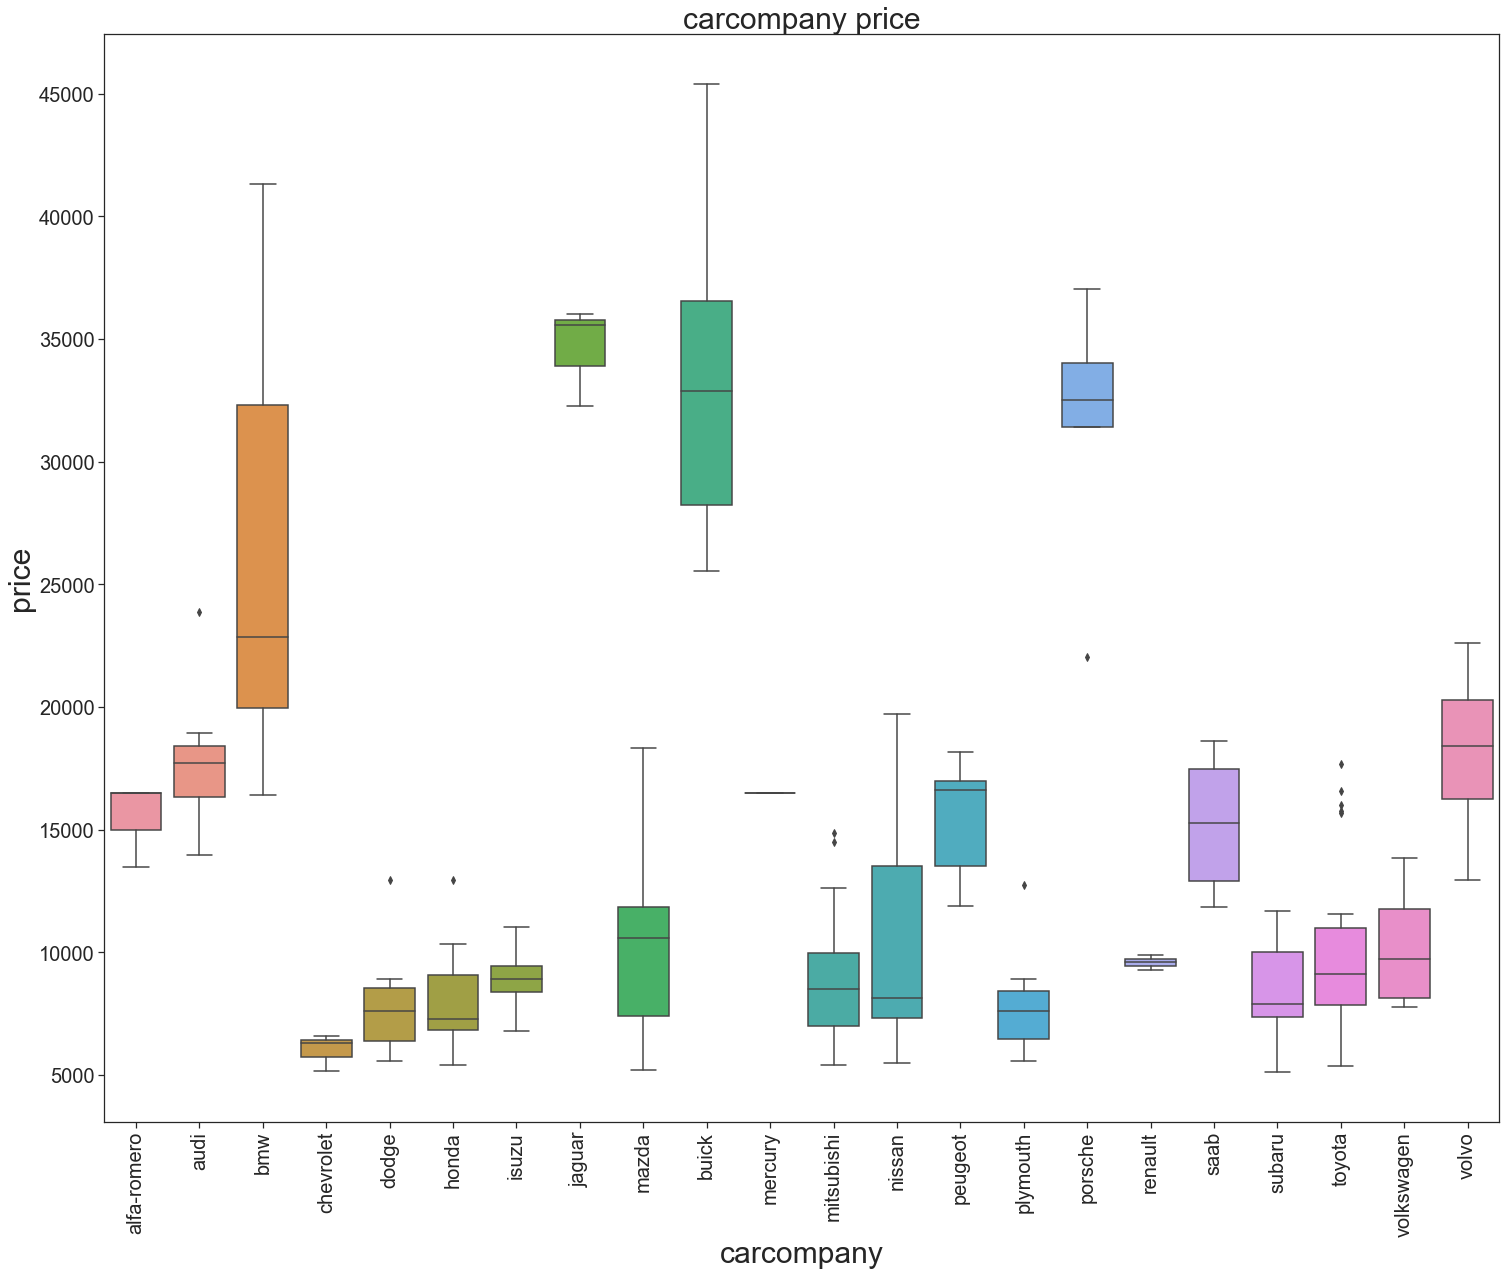

In [1329]:
plt.figure(figsize=(25,20)) 
sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
b =sns.boxplot(x="carcompany", y="price",data=carprice)
b.axes.set_title("carcompany price",fontsize=30)
b.set_xlabel("carcompany",fontsize=30)
b.set_ylabel("price",fontsize=30)
b.tick_params(labelsize=20)
b.set_xticklabels(b.get_xticklabels(),rotation=90)

Notice that two of the variables - `doornumber` and `cylindernumber` are numeric types with the numbers written as words. Let's map these to actual numbers to avoid too many dummy variable creations ahead.

Note that we can also treat them as categorical variables (these two and also, `symboling`) and create dummy variables for them. But we will turn them into numbers.

In [1330]:
# Checking the different levels of 'cylindernumber'
carprice['cylindernumber'].astype('category').value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [1331]:
# Checking the different levels of 'cylindernumber'
carprice['doornumber'].astype('category').value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [1332]:
# A function to map the categorical levels to actual numbers. 
def num_map(x):
    return x.map({'two': 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})

# Applying the function to the two columns
carprice[['cylindernumber', 'doornumber']] = carprice[['cylindernumber', 'doornumber']].apply(num_map)

Checking if there are variables having 2 values so that they can be changed into 1/0.

In [1333]:
for col in carprice.columns:
    if (len(carprice[col].unique()) == 2):
        print(col)
        print(carprice[col].value_counts())
        print()

fueltype
gas       185
diesel     20
Name: fueltype, dtype: int64

aspiration
std      168
turbo     37
Name: aspiration, dtype: int64

doornumber
4    115
2     90
Name: doornumber, dtype: int64

enginelocation
front    202
rear       3
Name: enginelocation, dtype: int64



In [1334]:
carprice.fueltype       = carprice.fueltype.map({'gas': 1, 'diesel': 0})
carprice.aspiration     = carprice.aspiration.map({'std': 1, 'turbo': 0})
#carprice.doornumber     = carprice.doornumber.map({2: 0, 4: 1})
carprice.enginelocation = carprice.enginelocation.map({'front': 1, 'rear': 0})

Now creating dummy variables for columns having more than 2 values.

In [1335]:
status = pd.get_dummies(carprice['carbody'], drop_first = True)
carprice = pd.concat([carprice, status], axis = 1)

In [1336]:
carprice.rename(columns={'hardtop': 'carbody_hardtop','hatchback':'carbody_hatchback','sedan':'carbody_sedan','wagon':'carbody_wagon'}, inplace=True)

In [1337]:
status = pd.get_dummies(carprice['drivewheel'], drop_first = True)
carprice = pd.concat([carprice, status], axis = 1)

In [1338]:
carprice.rename(columns={'fwd':'drivewheel_fwd','rwd':'drivewheel_rwd'}, inplace=True)

In [1339]:
status = pd.get_dummies(carprice['enginetype'], drop_first = True)
carprice = pd.concat([carprice, status], axis = 1)

In [1340]:
carprice.rename(columns={'dohcv':'enginetype_dohcv','l':'enginetype_l','ohc':'enginetype_ohc','ohcf':'enginetype_ohcf','ohcv':'enginetype_ohcv','rotor':'enginetype_rotor'}, inplace=True)

In [1341]:
#status = pd.get_dummies(carprice['cylindernumber'], drop_first = True)
##carprice = pd.concat([carprice, status], axis = 1)

In [1342]:
#carprice.rename(columns={'five':'cylinderno_five','four':'cylinderno_four','six':'cylinderno_six','three':'cylinderno_three','twelve':'cylinderno_twelve','two':'cylinderno_two'}, inplace=True)

In [1343]:
status = pd.get_dummies(carprice['fuelsystem'], drop_first = True)
carprice = pd.concat([carprice, status], axis = 1)

In [1344]:
carprice.rename(columns={'2bbl':'fuelsystem_2bbl','4bbl':'fuelsystem_4bbl','idi':'fuelsystem_idi','mfi':'fuelsystem_mfi','mpfi':'fuelsystem_mpfi','spdi':'fuelsystem_spdi','spfi':'fuelsystem_spfi'}, inplace=True)

In [1345]:
status = pd.get_dummies(carprice['carcompany'], drop_first = True)
carprice = pd.concat([carprice, status], axis = 1)

In [1346]:
carprice.rename(columns={'alfa-romero':'carcompany_alfa-romero',
                         'audi':'carcompany_audi',
                         'bmw':'carcompany_bmw',
                         'buick':'carcompany_buick',
                         'chevrolet':'carcompany_chevrolet',
                         'dodge':'carcompany_dodge',
                         'honda':'carcompany_honda',
                         'isuzu':'carcompany_isuzu',
                         'jaguar':'carcompany_jaguar',
                         'mazda':'carcompany_mazda',
                         'mercury':'carcompany_mercury',
                         'mitsubishi':'carcompany_mitsubishi',
                         'nissan':'carcompany_nissan',
                         'peugeot':'carcompany_peugeot',
                         'plymouth':'carcompany_plymouth',
                         'porsche':'carcompany_porsche',
                         'renault':'carcompany_renault',
                         'saab':'carcompany_saab',
                         'subaru':'carcompany_subaru',
                         'toyota':'carcompany_toyota',
                         'volkswagen':'carcompany_volkswagen',
                         'volvo':'carcompany_volvo'
                        }, inplace=True)

In [1347]:
carprice.drop(['carbody'], axis = 1, inplace = True)
carprice.drop(['drivewheel'], axis = 1, inplace = True)
carprice.drop(['enginetype'], axis = 1, inplace = True)
#carprice.drop(['cylindernumber'], axis = 1, inplace = True)
carprice.drop(['fuelsystem'], axis = 1, inplace = True)
carprice.drop(['carcompany'], axis = 1, inplace = True)

In [1348]:
#carprice.fuelsystem.unique()
#'gas', 'diesel'
#'std', 'turbo
#'two', 'four'
#'convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'
#'rwd', 'fwd', '4wd'
#'front', 'rear'
#'dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'
#'four', 'six', 'five', 'three', 'twelve', 'two', 'eight'
#'mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'

In [1349]:
carprice.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'carcompany_audi',
       'carcompany_bmw', 'carcompany_buick', 'carcompany_chevrolet',
       'carcompany_dodge', 'carcompany_honda', 'carcompany_isuzu',
       'carcompany_jaguar', 'carcompany_mazda', 'carcompany_mercury',
       'carcompany_mitsubishi', 'carcompany_nissan', 'carcompany_peugeot',
       

In [1350]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
symboling                205 non-null int64
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
cylindernumber           205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64

Splitting the data into train and test sets using sklearn.model_selection train_test_split. 70% tain, 30% test.

In [1922]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1923]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
122,1,1,1,4,1,93.7,167.3,63.8,50.8,2191,...,0,0,1,0,0,0,0,0,0,0
125,3,1,1,2,1,94.5,168.9,68.3,50.2,2778,...,0,0,0,1,0,0,0,0,0,0
166,1,1,1,2,1,94.5,168.7,64.0,52.6,2300,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
199,-1,1,0,4,1,104.3,188.8,67.2,57.5,3157,...,0,0,0,0,0,0,0,0,0,1


Scaling all the variables except zero-one and dummy variables.

In [1924]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()


In [1925]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price','symboling','carlength','carheight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','carwidth','curbweight','wheelbase','highwaympg','doornumber','cylindernumber']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Isha\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1926]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
122,0.170159,1,1,0.887412,1,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,...,0,0,1,0,0,0,0,0,0,0
125,1.848278,1,1,-1.126872,1,-0.677177,-0.359789,1.114978,-1.382026,0.439415,...,0,0,0,1,0,0,0,0,0,0
166,0.170159,1,1,-1.126872,1,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,...,0,0,0,0,0,0,0,1,0,0
1,1.848278,1,1,-1.126872,1,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,...,0,0,0,0,0,0,0,0,0,0
199,-1.507960,1,0,0.887412,1,0.972390,1.225364,0.616439,1.627983,1.137720,...,0,0,0,0,0,0,0,0,0,1


In [1927]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
count,1.430000e+02,143.000000,143.000000,1.430000e+02,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.473477e-17,0.909091,0.818182,9.006005e-17,0.993007,1.538785e-15,2.003060e-16,-4.093074e-15,5.450186e-16,-1.894367e-16,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.003515e+00,0.288490,0.387050,1.003515e+00,0.083624,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.347020e+00,0.000000,0.000000,-1.126872e+00,0.000000,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,-1.937401e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.689008e-01,1.000000,1.000000,-1.126872e+00,1.000000,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,-7.711028e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.701590e-01,1.000000,1.000000,8.874120e-01,1.000000,-3.405307e-01,-1.128552e-01,-1.993522e-01,6.112865e-02,-2.478347e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.701590e-01,1.000000,1.000000,8.874120e-01,1.000000,4.505882e-01,7.076008e-01,4.804736e-01,7.414732e-01,7.203955e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.848278e+00,1.000000,1.000000,8.874120e-01,1.000000,2.874442e+00,2.324616e+00,2.927846e+00,2.287711e+00,2.812547e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Using x_train and y_train for model bulding wherein y_train contains variable to be predicted, and x_train contains all columns. 

In [1928]:
y_train = df_train.pop('price')
x_train = df_train

In [1929]:
len(x_train.columns)

59

Using RFE for initial feature elimination.

In [1930]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1931]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [1932]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 45),
 ('fueltype', True, 1),
 ('aspiration', False, 16),
 ('doornumber', False, 39),
 ('enginelocation', True, 1),
 ('wheelbase', False, 28),
 ('carlength', False, 31),
 ('carwidth', True, 1),
 ('carheight', False, 26),
 ('curbweight', False, 17),
 ('cylindernumber', False, 32),
 ('enginesize', True, 1),
 ('boreratio', False, 18),
 ('stroke', False, 33),
 ('compressionratio', True, 1),
 ('horsepower', False, 23),
 ('peakrpm', False, 24),
 ('citympg', False, 37),
 ('highwaympg', False, 30),
 ('carbody_hardtop', False, 14),
 ('carbody_hatchback', False, 12),
 ('carbody_sedan', False, 13),
 ('carbody_wagon', False, 15),
 ('drivewheel_fwd', False, 35),
 ('drivewheel_rwd', False, 38),
 ('enginetype_dohcv', False, 22),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 20),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 41),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 36),
 ('fuelsystem_4bbl', False, 10),
 ('fuelsystem_idi', True, 1),
 ('

In [1933]:
col = x_train.columns[rfe.support_]
col

Index(['fueltype', 'enginelocation', 'carwidth', 'enginesize',
       'compressionratio', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'fuelsystem_idi', 'carcompany_bmw',
       'carcompany_mazda', 'carcompany_mitsubishi', 'carcompany_peugeot',
       'carcompany_renault', 'carcompany_subaru'],
      dtype='object')

In [1934]:
x_train.columns[~rfe.support_]

Index(['symboling', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'curbweight', 'cylindernumber', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'carcompany_audi', 'carcompany_buick',
       'carcompany_chevrolet', 'carcompany_dodge', 'carcompany_honda',
       'carcompany_isuzu', 'carcompany_jaguar', 'carcompany_mercury',
       'carcompany_nissan', 'carcompany_plymouth', 'carcompany_porsche',
       'carcompany_saab', 'carcompany_toyota', 'carcompany_volkswagen',
       'carcompany_volvo'],
      dtype='object')

In [1935]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [1936]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

C:\Users\Isha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1937]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [1938]:

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           4.59e-64
Time:                        13:09:45   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.20

Looking at the above summary, all the variables except fueltype look significant(if we consider significance level as P > |t| valau below 0.05).
Checking for VIF, to look for collinearity between independent variables.

In [1939]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Isha\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Isha\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
1,fueltype,inf
2,enginelocation,inf
7,enginetype_ohcf,inf
9,fuelsystem_idi,inf
15,carcompany_subaru,inf
5,compressionratio,42.32
13,carcompany_peugeot,9.73
6,enginetype_l,8.99
3,carwidth,3.38
4,enginesize,3.30


There are lot of variables having infinite VIF.
Will check for heatmap as well.

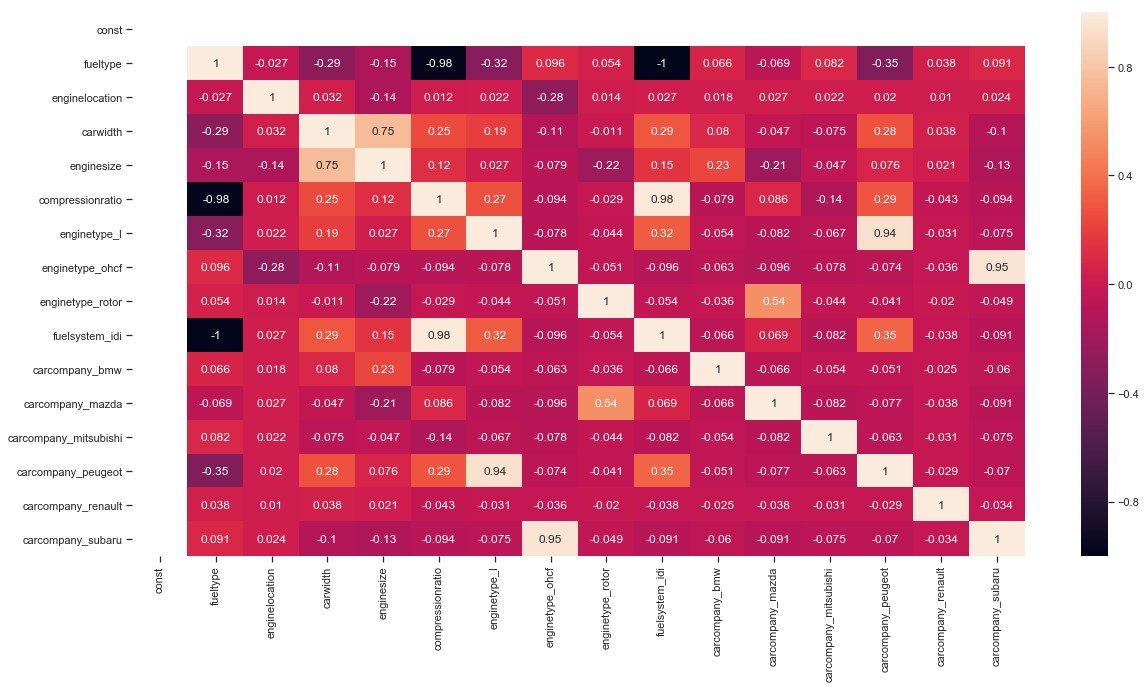

In [1940]:
plt.figure(figsize = (20,10))  
sns.heatmap(x_train_rfe.corr(),annot = True)

Targeting variables with inf VIF and rebuilding the model.

In [1941]:
x_train_rfe.drop('carcompany_subaru',axis=1,inplace=True)

In [1942]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

C:\Users\Isha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1943]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [1944]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           4.59e-64
Time:                        13:09:49   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.03

In [1945]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Isha\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Isha\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
1,fueltype,inf
9,fuelsystem_idi,inf
5,compressionratio,42.32
13,carcompany_peugeot,9.73
6,enginetype_l,8.99
3,carwidth,3.38
4,enginesize,3.30
8,enginetype_rotor,1.55
11,carcompany_mazda,1.50
2,enginelocation,1.20


In [1946]:
x_train_rfe.drop('fuelsystem_idi',axis=1,inplace=True)

In [1947]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

C:\Users\Isha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1948]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [1949]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           4.59e-64
Time:                        13:09:51   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.91

In [1950]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,666.63
1,fueltype,44.25
5,compressionratio,42.32
12,carcompany_peugeot,9.73
6,enginetype_l,8.99
3,carwidth,3.38
4,enginesize,3.30
8,enginetype_rotor,1.55
10,carcompany_mazda,1.50
2,enginelocation,1.20


Dropping compressionratio and rebuilding model.

In [1951]:
x_train_rfe.drop('compressionratio',axis=1,inplace=True)

In [1952]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

C:\Users\Isha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1953]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [1954]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     116.9
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           1.72e-63
Time:                        13:09:57   Log-Likelihood:                -26.477
No. Observations:                 143   AIC:                             78.95
Df Residuals:                     130   BIC:                             117.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.39

In [1955]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,184.94
11,carcompany_peugeot,9.54
5,enginetype_l,8.99
3,carwidth,3.30
4,enginesize,3.29
7,enginetype_rotor,1.52
9,carcompany_mazda,1.50
1,fueltype,1.25
2,enginelocation,1.19
6,enginetype_ohcf,1.15


Dropping enginetype_l and rebuilding the model.

In [1956]:
x_train_rfe.drop('enginetype_l',axis=1,inplace=True)

In [1957]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

C:\Users\Isha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1958]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [1959]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     120.7
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           6.35e-63
Time:                        13:10:02   Log-Likelihood:                -30.606
No. Observations:                 143   AIC:                             85.21
Df Residuals:                     131   BIC:                             120.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.39

In [1960]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,184.94
4,enginesize,3.28
3,carwidth,3.20
6,enginetype_rotor,1.52
8,carcompany_mazda,1.49
10,carcompany_peugeot,1.27
1,fueltype,1.24
2,enginelocation,1.19
5,enginetype_ohcf,1.14
7,carcompany_bmw,1.10


Dropping fueltype and rebuilding the model.

In [1961]:
x_train_rfe.drop('fueltype',axis=1,inplace=True)

In [1962]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

C:\Users\Isha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1963]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [1964]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     131.0
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           1.82e-63
Time:                        13:10:06   Log-Likelihood:                -31.942
No. Observations:                 143   AIC:                             85.88
Df Residuals:                     132   BIC:                             118.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.26

In [1965]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,173.67
3,enginesize,3.27
2,carwidth,3.10
5,enginetype_rotor,1.49
7,carcompany_mazda,1.47
1,enginelocation,1.19
9,carcompany_peugeot,1.18
4,enginetype_ohcf,1.14
6,carcompany_bmw,1.10
8,carcompany_mitsubishi,1.03


Dropping enginetype_ohcf and rebuilding the model.

In [1966]:
x_train_rfe.drop('enginetype_ohcf',axis=1,inplace=True)

In [1967]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

C:\Users\Isha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1968]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [1969]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     142.0
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           1.03e-63
Time:                        13:10:28   Log-Likelihood:                -34.059
No. Observations:                 143   AIC:                             88.12
Df Residuals:                     133   BIC:                             117.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.03

In [1921]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,172.88
3,enginesize,3.22
2,carwidth,3.08
1,enginelocation,1.19
8,carcompany_peugeot,1.17
5,enginetype_rotor,1.15
4,enginetype_ohcf,1.13
6,carcompany_bmw,1.10
7,carcompany_mitsubishi,1.02
9,carcompany_renault,1.01


Dropping carcompany_mazda and rebuilding the model.

In [1970]:
x_train_rfe.drop('carcompany_mazda',axis=1,inplace=True)

In [1971]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [1972]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [1973]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     157.0
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           3.52e-64
Time:                        13:10:54   Log-Likelihood:                -35.665
No. Observations:                 143   AIC:                             89.33
Df Residuals:                     134   BIC:                             116.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.02

In [1974]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,155.78
3,enginesize,3.19
2,carwidth,3.07
7,carcompany_peugeot,1.16
4,enginetype_rotor,1.14
1,enginelocation,1.09
5,carcompany_bmw,1.09
6,carcompany_mitsubishi,1.01
8,carcompany_renault,1.01


Now both p-values and VIF look fine for all variables.

### Residual analysis of train data

Checking if error terms are normally distributed.

In [1975]:
y_train_price = lm.predict(x_train_rfe)

In [1976]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Isha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Errors')

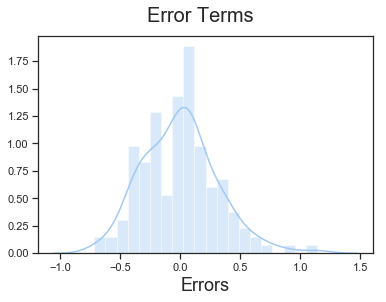

In [1977]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Making predictions

Applying scaling to test data.

In [1978]:
num_vars = ['price','symboling','carlength','carheight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','carwidth','curbweight','wheelbase','highwaympg','doornumber','cylindernumber']

df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Isha\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Dividing into X_test and y_test

In [1979]:
y_test = df_test.pop('price')
X_test = df_test

In [1980]:
x_train_rfe.columns
X_train_new = x_train_rfe.drop(['const'], axis=1)

In [1981]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

C:\Users\Isha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1982]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### Model Evaluation

Text(0, 0.5, 'y_pred')

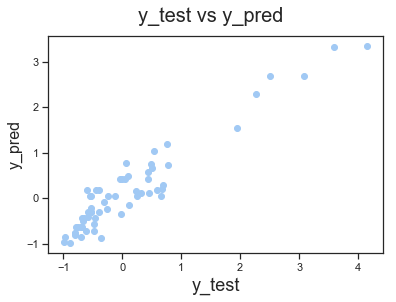

In [1983]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [1984]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8998303797955133

This was with RFE with a value of 15 and later some manual feature elimination looking at variable significance, VIF and maintaining the decreasing value of Adjusted R Square to as max as possible in the process of manually eliminationg the variables one by one.

We can also try for other feature elimination/ concurrency removal techniques like PCA, Lasso and Ridge Regression or choosing the Optimal value N value in RFE using Grid Search Cross validation etc.
Will add these techniques in different solutions and upload.